In [2]:
import pandas as pd
import pymongo
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
flight_df = pd.read_csv('Flights_Delay.csv')

In [4]:
mean_num = flight_df['ARRIVAL_DELAY'].mean()
flight_df['ARRIVAL_DELAY'] = flight_df['ARRIVAL_DELAY'].fillna(mean_num)

In [5]:
mean_num = flight_df['DEPARTURE_DELAY'].mean()
flight_df['DEPARTURE_DELAY'] = flight_df['DEPARTURE_DELAY'].fillna(mean_num)

In [6]:
mean_num = flight_df['AIR_TIME'].mean()
flight_df['AIR_TIME'] = flight_df['AIR_TIME'].fillna(mean_num)

In [7]:
flight_df['DEPARTURE_TIME'] = flight_df['DEPARTURE_TIME'].fillna(-1)
flight_df['ARRIVAL_TIME'] = flight_df['ARRIVAL_TIME'].fillna(-1)

### 1. Create collections “flights” inside database “airline_delayDB”
### 2. How would you insert this entire dataset into a MongoDB collection named flights? Describe the structure of each document.


In [8]:

client = pymongo.MongoClient('localhost:27017')
db = client['flight_db']

flight_docs = flight_df.to_dict('records')

collection_name = 'flight'

if collection_name in db.list_collection_names():
    db[collection_name].drop()

flights = db[collection_name]

if flight_docs:
    flights.insert_many(flight_docs)


### 3. Write a MongoDB command to insert a single flight record from the dataset.


In [9]:

flights.insert_one({
    "ID": 56000,
    "YEAR": 2015,
    "MONTH": 3,
    "DAY": 4,
    "DAY_OF_WEEK": 3,
    "AIRLINE": "EV",
    "FLIGHT_NUMBER": 5170,
    "TAIL_NUMBER": "N842AS",
    "ORIGIN_AIRPORT": "CVG",
    "DESTINATION_AIRPORT": "XNA",
    "SCHEDULED_DEPARTURE": 935,
    "DEPARTURE_TIME": 954,
    "DEPARTURE_DELAY": 19,
    "TAXI_OUT": 16,
    "WHEELS_OFF": 1010,
    "SCHEDULED_TIME": 115,
    "ELAPSED_TIME": 129,
    "AIR_TIME": 108,
    "DISTANCE": 562,
    "WHEELS_ON": 1058,
    "TAXI_IN": 5,
    "SCHEDULED_ARRIVAL": 1030,
    "ARRIVAL_TIME": 1103,
    "ARRIVAL_DELAY": 33,
    "DIVERTED": 0,
    "CANCELLED": 0,
    "CANCELLATION_REASON": "",
    "AIR_SYSTEM_DELAY": 14,
    "SECURITY_DELAY": 0,
    "AIRLINE_DELAY": 19,
    "LATE_AIRCRAFT_DELAY": 0,
    "WEATHER_DELAY": 0
})

InsertOneResult(ObjectId('66d59b889fafc13a4203fbad'), acknowledged=True)

### 4. Write a MongoDB query to find all flights that were delayed by more than 60 minutes.


In [10]:
delayed_flights = flights.find({'$or': [{'ARRIVAL_DELAY': {'$gt' : 60}},{'DEPARTURE_DELAY' : {'$gt' : 60}}]},
                               {'_id':0,'FLIGHT_NUMBER':1,'AIRLINE':1}).limit(20)
for flight in delayed_flights:
    print(flight)

{'AIRLINE': 'B6', 'FLIGHT_NUMBER': 716}
{'AIRLINE': 'OO', 'FLIGHT_NUMBER': 6196}
{'AIRLINE': 'US', 'FLIGHT_NUMBER': 1756}
{'AIRLINE': 'OO', 'FLIGHT_NUMBER': 2699}
{'AIRLINE': 'F9', 'FLIGHT_NUMBER': 661}
{'AIRLINE': 'US', 'FLIGHT_NUMBER': 686}
{'AIRLINE': 'OO', 'FLIGHT_NUMBER': 4544}
{'AIRLINE': 'WN', 'FLIGHT_NUMBER': 1165}
{'AIRLINE': 'EV', 'FLIGHT_NUMBER': 3936}
{'AIRLINE': 'DL', 'FLIGHT_NUMBER': 1088}
{'AIRLINE': 'US', 'FLIGHT_NUMBER': 1784}
{'AIRLINE': 'B6', 'FLIGHT_NUMBER': 577}
{'AIRLINE': 'US', 'FLIGHT_NUMBER': 1748}
{'AIRLINE': 'MQ', 'FLIGHT_NUMBER': 3019}
{'AIRLINE': 'OO', 'FLIGHT_NUMBER': 4695}
{'AIRLINE': 'MQ', 'FLIGHT_NUMBER': 3564}
{'AIRLINE': 'UA', 'FLIGHT_NUMBER': 1667}
{'AIRLINE': 'MQ', 'FLIGHT_NUMBER': 3621}
{'AIRLINE': 'F9', 'FLIGHT_NUMBER': 667}
{'AIRLINE': 'EV', 'FLIGHT_NUMBER': 5447}


#### 5. How would you query all flights that were cancelled (CANCELLED flag set to 1) and return only the AIRLINE, ORIGIN_AIRPORT, and CANCELLATION_REASON fields?

In [11]:

cancelled_flights = flights.find({'CANCELLED': 1},
                                 {'_id':0,'AIRLINE':1,'ORIGIN_AIRPORT':1,'CANCELLATION_REASON':1}
                                 ).limit(20)
for flight in cancelled_flights:
    print(flight)

{'AIRLINE': 'EV', 'ORIGIN_AIRPORT': 'MLI', 'CANCELLATION_REASON': 'C'}
{'AIRLINE': 'WN', 'ORIGIN_AIRPORT': 'BWI', 'CANCELLATION_REASON': 'B'}
{'AIRLINE': 'DL', 'ORIGIN_AIRPORT': 'SFO', 'CANCELLATION_REASON': 'B'}
{'AIRLINE': 'AA', 'ORIGIN_AIRPORT': 'DFW', 'CANCELLATION_REASON': 'B'}
{'AIRLINE': 'MQ', 'ORIGIN_AIRPORT': 'LGA', 'CANCELLATION_REASON': 'B'}
{'AIRLINE': 'AA', 'ORIGIN_AIRPORT': 'BDL', 'CANCELLATION_REASON': 'B'}
{'AIRLINE': 'WN', 'ORIGIN_AIRPORT': 'MKE', 'CANCELLATION_REASON': 'B'}
{'AIRLINE': 'US', 'ORIGIN_AIRPORT': 'DCA', 'CANCELLATION_REASON': 'B'}
{'AIRLINE': 'WN', 'ORIGIN_AIRPORT': 'FLL', 'CANCELLATION_REASON': 'B'}
{'AIRLINE': 'EV', 'ORIGIN_AIRPORT': 'ORF', 'CANCELLATION_REASON': 'B'}
{'AIRLINE': 'US', 'ORIGIN_AIRPORT': 'PHL', 'CANCELLATION_REASON': 'B'}
{'AIRLINE': 'MQ', 'ORIGIN_AIRPORT': 'SHV', 'CANCELLATION_REASON': 'B'}
{'AIRLINE': 'UA', 'ORIGIN_AIRPORT': 'LGA', 'CANCELLATION_REASON': 'C'}
{'AIRLINE': 'EV', 'ORIGIN_AIRPORT': 'DFW', 'CANCELLATION_REASON': 'A'}
{'AIRL

#### 6. Using MongoDB’s aggregation framework, how would you calculate the average arrival delay (ARRIVAL_DELAY) for each airline? [Create a suitable plot using matplotlib/seaborn]

C:\Users\Administrator\AppData\Local\Temp\ipykernel_20424\3884931128.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=delay_df, x='_id', y='avgDelay', palette='viridis')


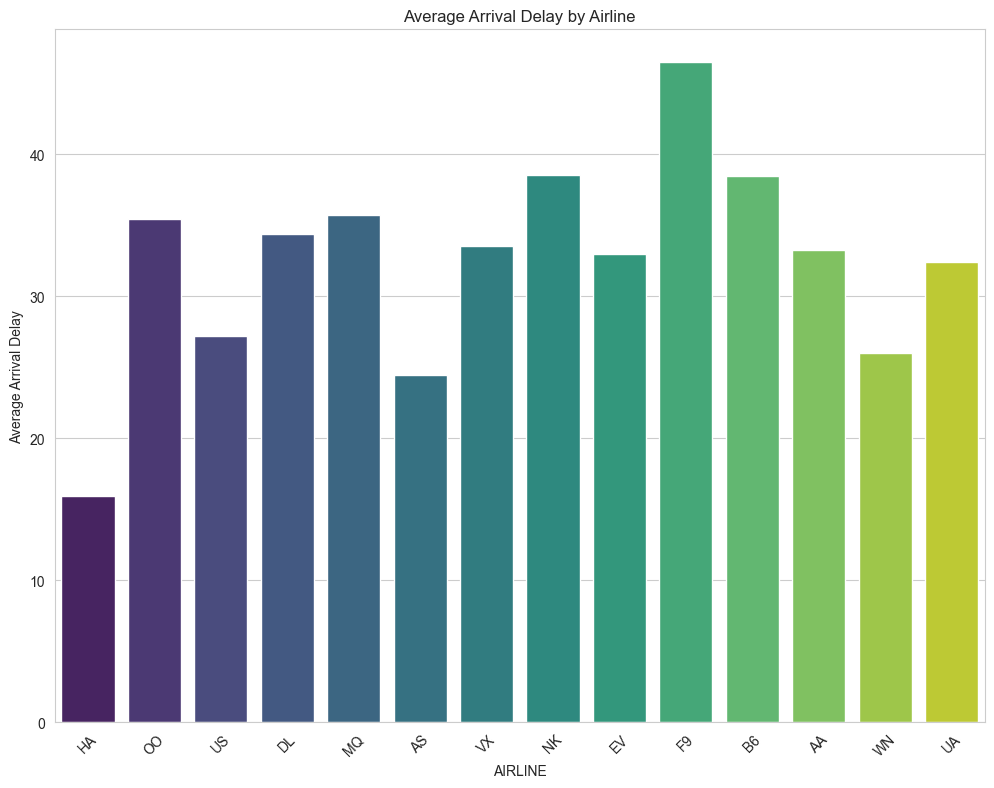

In [12]:
avg_flight_delays = flights.aggregate([
    {'$match': {'ARRIVAL_DELAY': {'$gt': 0}}},
    {'$group': {'_id':'$AIRLINE', 'avgDelay': {'$avg':'$ARRIVAL_DELAY'}}},
    {'$project': {'AIRLINE':1,'avgDelay' :{'$round': ['$avgDelay',2]}}}
])

delay_df = pd.DataFrame(list(avg_flight_delays))

plt.figure(figsize=(12, 9))
sns.set_style('whitegrid')
sns.barplot(data=delay_df, x='_id', y='avgDelay', palette='viridis')
plt.xlabel('AIRLINE')
plt.ylabel('Average Arrival Delay')
plt.title('Average Arrival Delay by Airline')
plt.xticks(rotation=45)
plt.show()

#### 7. Days of months with respect to average of arrival delays. [Create a suitable plot using matplotlib/seaborn]


C:\Users\Administrator\AppData\Local\Temp\ipykernel_20424\3326003921.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=day_df, x='DAY', y='avgDelay', palette='viridis')


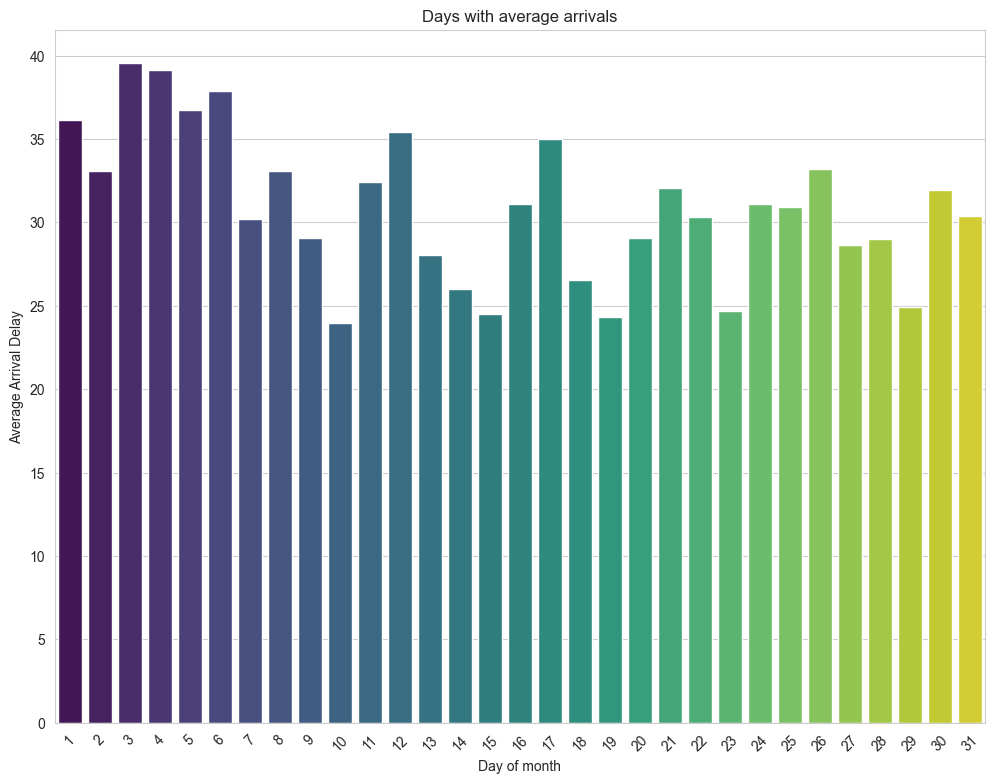

In [13]:
day_delays = flights.aggregate([
    {'$match': {'ARRIVAL_DELAY': {'$gt': 0}}},
    {'$group': {'_id':'$DAY', 'avgDelay': {'$avg':'$ARRIVAL_DELAY'}}},
    {'$project': {'_id' :0,'DAY':'$_id','avgDelay' :{'$round': ['$avgDelay',2]}}},
    {'$sort':{'_id':1}}
])

day_df = pd.DataFrame(list(day_delays))

plt.figure(figsize=(12, 9))
sns.set_style('whitegrid')
sns.barplot(data=day_df, x='DAY', y='avgDelay', palette='viridis')
plt.xlabel('Day of month')
plt.ylabel('Average Arrival Delay')
plt.title('Days with average arrivals')
plt.xticks(rotation=45)
plt.show()

#### 8. Write a MongoDB aggregation pipeline to find the top 10 airports with the highest average total delay (DEPARTURE_DELAY + ARRIVAL_DELAY)

In [14]:
day_delays = flights.aggregate([
    {'$match': {'DEPARTURE_DELAY': {'$gt': 0},'ARRIVAL_DELAY': {'$gt': 0}}},
    {'$group': {'_id':'$ORIGIN_AIRPORT', 'avgDelay': {'$avg':{'$add' :['$DEPARTURE_DELAY','$ARRIVAL_DELAY'] }}}},
    {'$project': {'_id' : 0,'AIRPORT':'$_id','avgDelay' :{'$round': ['$avgDelay',2]}}},
    {'$sort':{'avgDelay':-1}},
    {'$limit':10}
])

for i in day_delays:
    print(i)

{'AIRPORT': 'CDC', 'avgDelay': 1082.0}
{'AIRPORT': 'PIH', 'avgDelay': 964.0}
{'AIRPORT': 'HOB', 'avgDelay': 772.0}
{'AIRPORT': 'ILG', 'avgDelay': 551.0}
{'AIRPORT': 'SCE', 'avgDelay': 500.5}
{'AIRPORT': 'HIB', 'avgDelay': 473.0}
{'AIRPORT': 'BRW', 'avgDelay': 329.5}
{'AIRPORT': 'JLN', 'avgDelay': 327.47}
{'AIRPORT': 'DLH', 'avgDelay': 312.0}
{'AIRPORT': 'AVL', 'avgDelay': 298.6}


#### 9. Explain how you would create an index on the ORIGIN_AIRPORT and DESTINATION_AIRPORT fields to optimize queries filtering by these fields.


In [15]:
flights.create_index(['ORIGIN_AIRPORT','DESTINATION_AIRPORT'])

for i in flights.find({},{'_id':0,'ORIGIN_AIRPORT':1,'DESTINATION_AIRPORT':1}).limit(20):
    print(i)


{'ORIGIN_AIRPORT': 'CVG', 'DESTINATION_AIRPORT': 'XNA'}
{'ORIGIN_AIRPORT': 'DFW', 'DESTINATION_AIRPORT': 'SPS'}
{'ORIGIN_AIRPORT': 'JAX', 'DESTINATION_AIRPORT': 'DCA'}
{'ORIGIN_AIRPORT': 'COS', 'DESTINATION_AIRPORT': 'IAH'}
{'ORIGIN_AIRPORT': 'ATL', 'DESTINATION_AIRPORT': 'AVL'}
{'ORIGIN_AIRPORT': 'IAH', 'DESTINATION_AIRPORT': 'SFO'}
{'ORIGIN_AIRPORT': 'HDN', 'DESTINATION_AIRPORT': 'DEN'}
{'ORIGIN_AIRPORT': 'ATL', 'DESTINATION_AIRPORT': 'CAK'}
{'ORIGIN_AIRPORT': 'HOU', 'DESTINATION_AIRPORT': 'MEM'}
{'ORIGIN_AIRPORT': 'DAL', 'DESTINATION_AIRPORT': 'MAF'}
{'ORIGIN_AIRPORT': 'TPA', 'DESTINATION_AIRPORT': 'EWR'}
{'ORIGIN_AIRPORT': 'TPA', 'DESTINATION_AIRPORT': 'CLE'}
{'ORIGIN_AIRPORT': 'LAS', 'DESTINATION_AIRPORT': 'SJC'}
{'ORIGIN_AIRPORT': 'ITO', 'DESTINATION_AIRPORT': 'HNL'}
{'ORIGIN_AIRPORT': 'ONT', 'DESTINATION_AIRPORT': 'SFO'}
{'ORIGIN_AIRPORT': 'SAF', 'DESTINATION_AIRPORT': 'DFW'}
{'ORIGIN_AIRPORT': 'PDX', 'DESTINATION_AIRPORT': 'LAS'}
{'ORIGIN_AIRPORT': 'SEA', 'DESTINATION_AIRPORT':

#### 10. Arrange weekdays with respect to the average arrival delays caused. [Create a suitable plot using matplotlib/seaborn]

C:\Users\Administrator\AppData\Local\Temp\ipykernel_20424\3066390209.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=week_df, x='_id', y='avgDelay', palette='viridis')


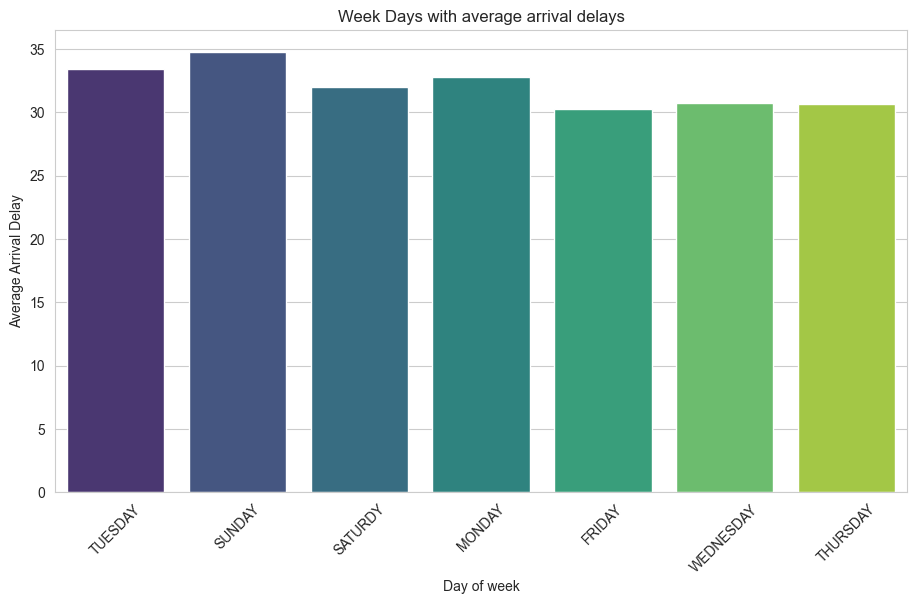

In [16]:
week_delays = flights.aggregate([
    {'$match': {'ARRIVAL_DELAY': {'$gt': 0}}},
    {'$group': {'_id':'$DAY_OF_WEEK', 'avgDelay': {'$avg':'$ARRIVAL_DELAY'}}},
    {'$project': {'_id':0 ,'DAY_OF_WEEK':'$_id','avgDelay' :{'$round': ['$avgDelay',2]}}},
    {'$sort':{'_id':1}}
])

week_df = pd.DataFrame(list(week_delays))
week_df['_id'] = week_df['DAY_OF_WEEK'].apply(lambda x:'MONDAY' if x == 1 
                                         else 'TUESDAY' if x == 2 
                                         else 'WEDNESDAY' if x == 3 
                                         else 'THURSDAY' if x==4 
                                         else 'FRIDAY' if x==5 
                                         else 'SATURDY' if x==6 
                                         else 'SUNDAY')
plt.figure(figsize=(11, 6))
sns.set_style('whitegrid')
sns.barplot(data=week_df, x='_id', y='avgDelay', palette='viridis')
plt.xlabel('Day of week')
plt.ylabel('Average Arrival Delay')
plt.title('Week Days with average arrival delays')
plt.xticks(rotation=45)
plt.show()

#### 11. Arrange Days of month as per cancellations done in descending order. [Create a suitable plot using matplotlib/seaborn]


C:\Users\Administrator\AppData\Local\Temp\ipykernel_20424\3730137490.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cancellation_df, x='DAY', y='cancellations', palette='viridis')


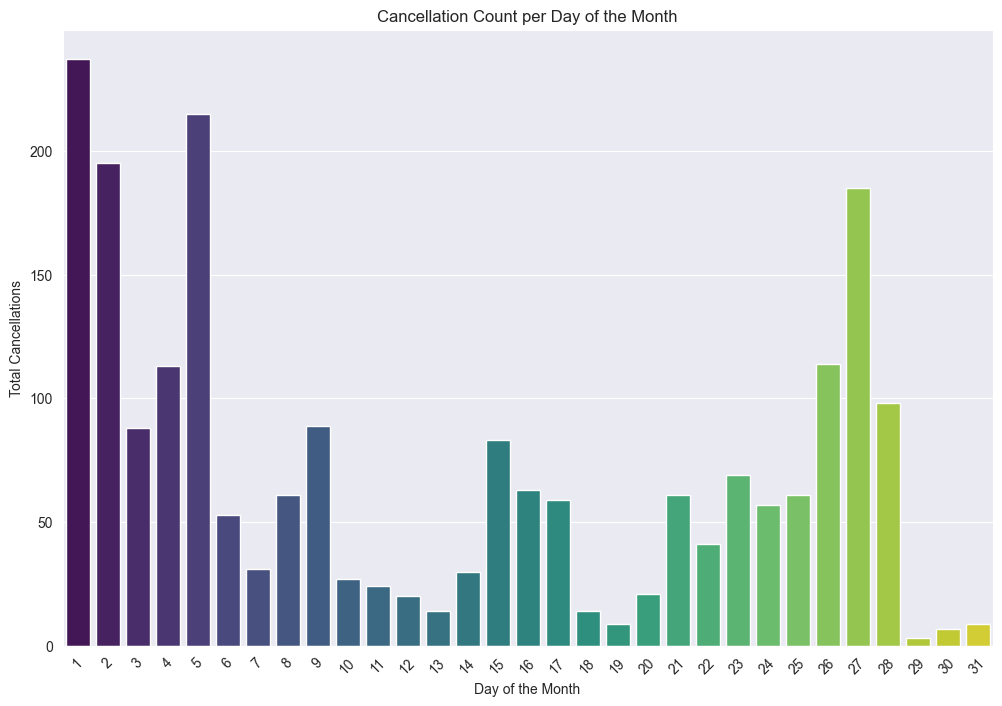

In [17]:
cancellation_days = flights.aggregate([
    {'$match': {'CANCELLED' : 1}},
    {'$group': {'_id': '$DAY', 'cancellations': {'$sum': '$CANCELLED'}}},
    {'$project': {'_id': 0, 'DAY': '$_id', 'cancellations': 1}},
    {'$sort': {'cancellations': -1}}
])

cancellation_df = pd.DataFrame(cancellation_days)

plt.figure(figsize=(12, 8))
sns.set_style('darkgrid')
sns.barplot(data=cancellation_df, x='DAY', y='cancellations', palette='viridis')
plt.xlabel('Day of the Month')
plt.ylabel('Total Cancellations')
plt.title('Cancellation Count per Day of the Month')
plt.xticks(rotation=45)
plt.show()


#### 12. Find the busiest airports with respect to day of week. Represent it by using suitable plot.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_20424\1335633140.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=buzy_airport_df, x='DAY_OF_WEEK', y='COUNT', palette='viridis')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_20424\1335633140.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Airport')


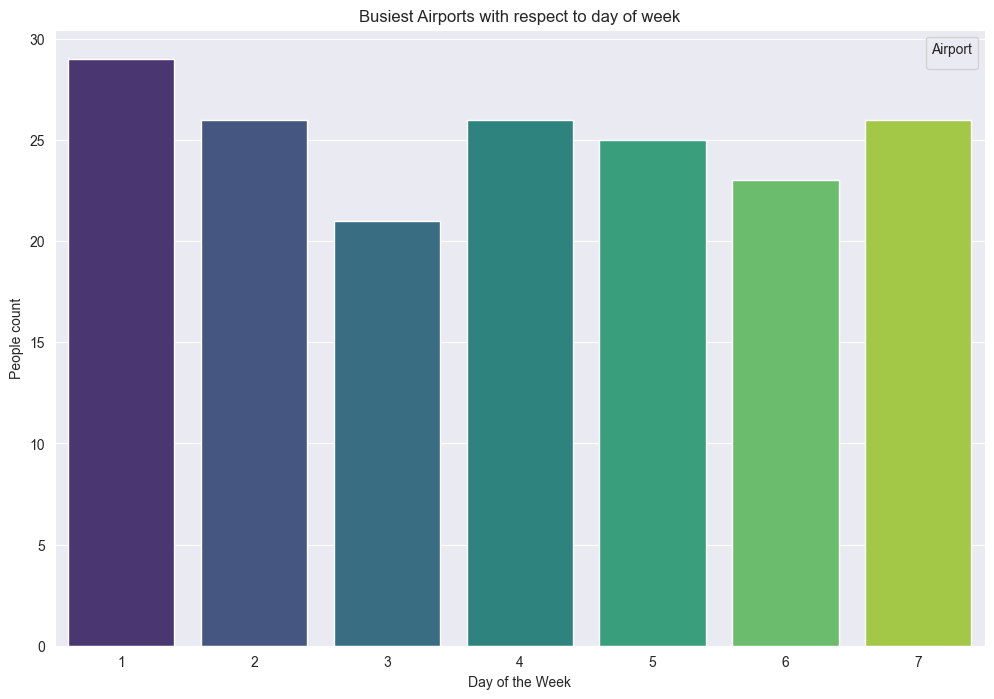

In [22]:
busiest_airports = flights.aggregate([
    {'$group': {'_id': {'OAIRPORT': '$ORIGIN_AIRPORT','DAIRPORT': '$DESTINATION_AIRPORT', 
                        'DAY_OF_WEEK': '$DAY_OF_WEEK'},'count': {'$sum': 1}}},
    {'$project': {'_id': 0,'AIRPORT': '$_id.OAIRPORT','AIRPORT': '$_id.DAIRPORT',
                  'DAY_OF_WEEK': '$_id.DAY_OF_WEEK','count': 1}},
    {'$sort': {'DAY_OF_WEEK': 1,'count': -1}},
    {'$group': {'_id': '$DAY_OF_WEEK','ORIGIN_AIRPORT': {'$first': '$OAIRPORT'},
                'DESTINATION_AIRPORT': {'$first': '$DAIRPORT'},
                'COUNT': {'$first': '$count'}}},
    {'$project': {'_id': 0,'DAY_OF_WEEK': '$_id','ORIGIN_AIRPORT': 1,'DESTINATION_AIRPORT':1,'COUNT': 1}}
])

buzy_airport_df = pd.DataFrame(busiest_airports)

plt.figure(figsize=(12, 8))
sns.barplot(data=buzy_airport_df, x='DAY_OF_WEEK', y='COUNT', palette='viridis')
plt.title('Busiest Airports with respect to day of week')
plt.xlabel('Day of the Week')
plt.ylabel('People count')
plt.legend(title='Airport')
plt.show()

#### 13. Find top 10 Airlines of US. Represent it by using suitable plot.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_12044\352539882.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_airlines_df['AIRLINE'], y=top_airlines_df['count'], palette='viridis')


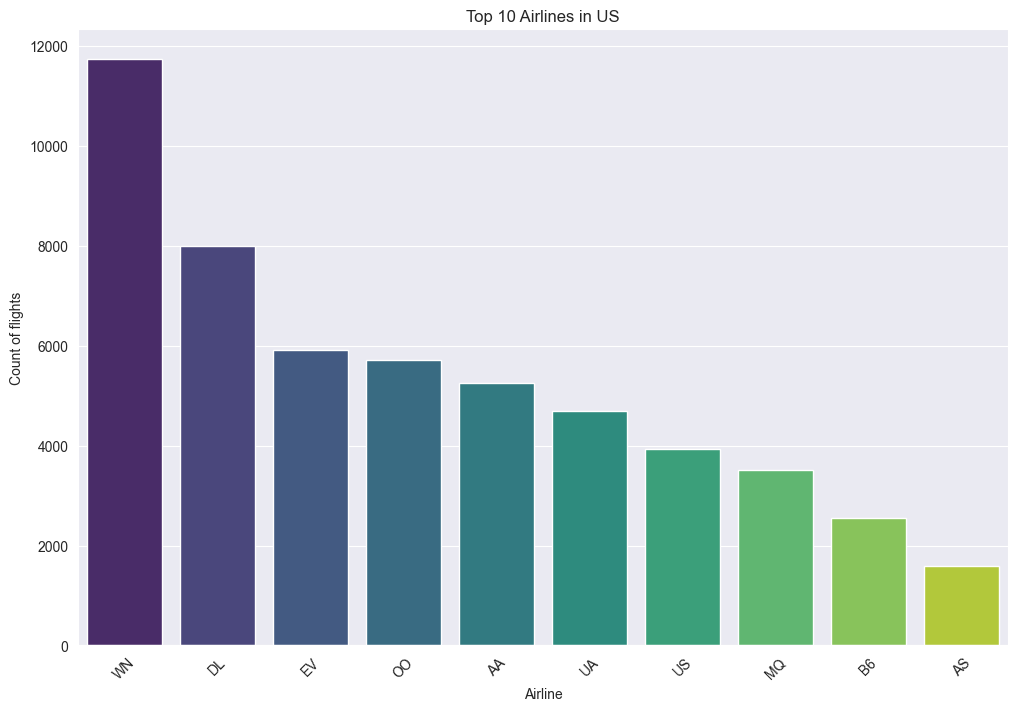

In [ ]:
top_airlines = flights.aggregate([
    {'$group':{'_id':'$AIRLINE','count':{'$sum' : 1}}},
    {'$project':{'_id':0,'AIRLINE':'$_id','count':1}},
    {'$sort':{'count':-1}},
    {'$limit':10}
])
top_airlines_df = pd.DataFrame(top_airlines)

plt.figure(figsize=(12, 8))
sns.set_style('darkgrid')
sns.barplot(x=top_airlines_df['AIRLINE'], y=top_airlines_df['count'], palette='viridis')
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.title('Top 10 Airlines in US')
plt.xticks(rotation=45)
plt.show()


#### 14. Finding airlines that make the maximum, minimum number of cancellations.


In [ ]:
# max_cancel = flights.aggregate([
#     { '$match': { 'CANCELLED': 1 } },
#     { '$group': {
#         '_id': "$AIRLINE",
#         'cancellations': { '$sum': 1 }
#     }},
#     {'$sort':{'cancellations':-1}},
#     {'$limit':1},
#     { '$project': {
#         '_id': 0,
#         'AIRLINE': "$_id",
#         'cancellations': 1
#     }}
# ])


minmax_cancel = flights.aggregate([
    { '$match': { 'CANCELLED': 1 } },
    { '$group': {
        '_id': "$AIRLINE",
        'cancellations': { '$sum': 1 }
    }},
    { '$facet': { 'max_cancel': [
            {'$sort': {'cancellations': -1}},
            {'$limit': 1},
            { '$project': {
                '_id': 0,
                'AIRLINE': "$_id",
                'cancellations': 1
            }}],
        'min_cancel': [
            {'$sort': {'cancellations': 1}},
            {'$limit': 1},
            { '$project': {
                '_id': 0,
                'AIRLINE': "$_id",
                'cancellations': 1}}]
                }
    }
])

for i in minmax_cancel: 
    print(i)

{'max_cancel': [{'cancellations': 414, 'AIRLINE': 'MQ'}], 'min_cancel': [{'cancellations': 3, 'AIRLINE': 'HA'}]}


#### 15. Find and show airlines names in descending that make the most number of diversions made. [Create a suitable plot using matplotlib/seaborn]


C:\Users\Administrator\AppData\Local\Temp\ipykernel_12044\3303378423.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(max_diversion_df,x='AIRLINE',y='diversions',palette='viridis')


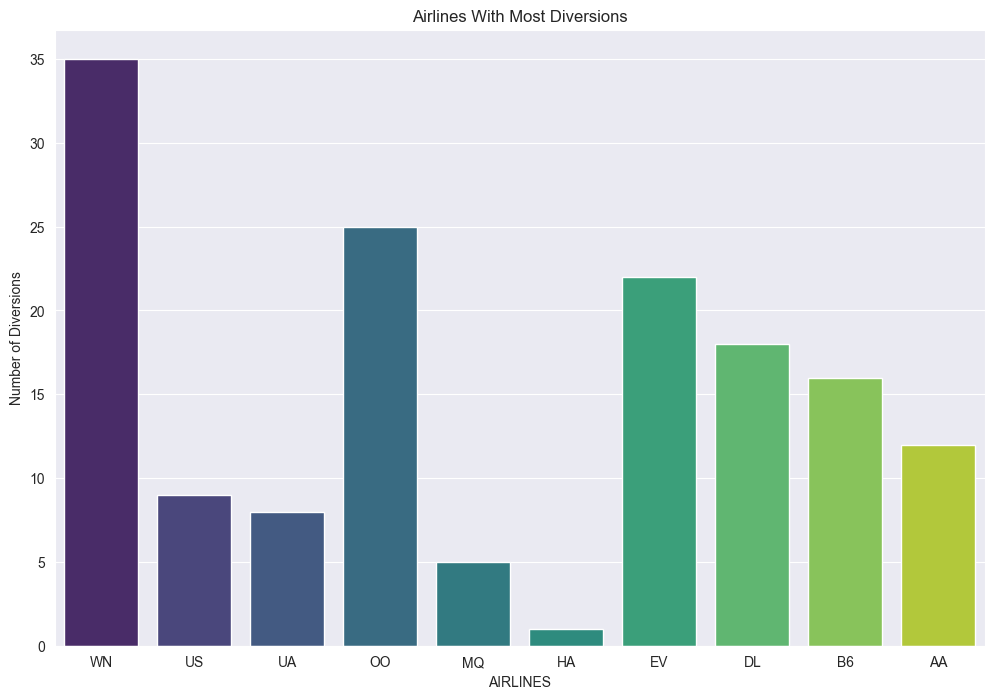

In [ ]:
max_diversion = flights.aggregate([
    {'$match':{'DIVERTED':1}},
    {'$group': {'_id': "$AIRLINE",'diversions': {'$sum':'$DIVERTED'}}},
    {'$project': {'_id':0,'AIRLINE':'$_id','diversions':1}},
    {'$sort':{'AIRLINE':-1}}
])

max_diversion_df =pd.DataFrame(max_diversion)

plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
sns.barplot(max_diversion_df,x='AIRLINE',y='diversions',palette='viridis')
plt.title('Airlines With Most Diversions')
plt.xlabel('AIRLINES')
plt.ylabel('Number of Diversions')
plt.show()

In [ ]:
for i in flights.find_one():
    print(i)

_id
ID
YEAR
MONTH
DAY
DAY_OF_WEEK
AIRLINE
FLIGHT_NUMBER
TAIL_NUMBER
ORIGIN_AIRPORT
DESTINATION_AIRPORT
SCHEDULED_DEPARTURE
DEPARTURE_TIME
DEPARTURE_DELAY
TAXI_OUT
WHEELS_OFF
SCHEDULED_TIME
ELAPSED_TIME
AIR_TIME
DISTANCE
WHEELS_ON
TAXI_IN
SCHEDULED_ARRIVAL
ARRIVAL_TIME
ARRIVAL_DELAY
DIVERTED
CANCELLED
CANCELLATION_REASON
AIR_SYSTEM_DELAY
SECURITY_DELAY
AIRLINE_DELAY
LATE_AIRCRAFT_DELAY
WEATHER_DELAY


#### 16. Finding days of month that see the most number of diversion and delays.
 

In [ ]:
number_of_diversions = flights.aggregate([
    {'$group': {'_id': '$DAY','total_diversions': { '$sum': '$DIVERTED' },
                'total_delays': { '$sum': { '$add': ['$ARRIVAL_DELAY','$DEPARTURE_DELAY']}}}},
    {'$project': {'_id': 0,'DAY': '$_id','total_diversions': 1,'total_delays': 1}},
    {'$sort': {'total_diversions': -1,'total_delays': -1}},
    {'$limit':20}
])

for i in number_of_diversions:
    print(i)


{'total_diversions': 15, 'total_delays': 83444.06075661737, 'DAY': 2}
{'total_diversions': 13, 'total_delays': 69743.05544624574, 'DAY': 1}
{'total_diversions': 12, 'total_delays': 93534.38226739684, 'DAY': 4}
{'total_diversions': 11, 'total_delays': 87888.04081527858, 'DAY': 5}
{'total_diversions': 9, 'total_delays': 36363.75671576428, 'DAY': 9}
{'total_diversions': 8, 'total_delays': 11124.27104460393, 'DAY': 14}
{'total_diversions': 7, 'total_delays': 66690.84021543432, 'DAY': 6}
{'total_diversions': 6, 'total_delays': 25587.409222091712, 'DAY': 7}
{'total_diversions': 6, 'total_delays': 20852.61663387372, 'DAY': 23}
{'total_diversions': 5, 'total_delays': 89013.04215267168, 'DAY': 3}
{'total_diversions': 5, 'total_delays': 37673.087509893914, 'DAY': 8}
{'total_diversions': 5, 'total_delays': 20776.716467495356, 'DAY': 11}
{'total_diversions': 5, 'total_delays': 18703.97097672936, 'DAY': 18}
{'total_diversions': 5, 'total_delays': 10682.520042047961, 'DAY': 30}
{'total_diversions': 

#### 17. Write a MongoDB query to find the flights with the shortest and longest AIR_TIME. Return the flightNumber, airline, and AIR_TIME.

In [ ]:
long_short_flights = flights.aggregate([
    {'$facet':{
        'longest_time': [
            {'$project': {'_id': 0,'FLIGHT_NUMBER': 1,'AIRLINE':1,'AIR_TIME':1}},
            {'$sort': {'AIR_TIME':-1}},
            {'$limit': 1}
        ],
        'shortest_time': [
            {'$project': {'_id': 0,'FLIGHT_NUMBER': 1,'AIRLINE':1,'AIR_TIME':1}},
            {'$sort': {'AIR_TIME':1}},
            {'$limit': 1}
        ],
    }}
])
for i in long_short_flights:
    print(i)

{'longest_time': [{'AIRLINE': 'UA', 'FLIGHT_NUMBER': 15, 'AIR_TIME': 654.0}], 'shortest_time': [{'AIRLINE': 'AS', 'FLIGHT_NUMBER': 65, 'AIR_TIME': 9.0}]}


#### 18. Finding all diverted Route from a source to destination Airport & which route is the most diverted route.


In [ ]:
flight_df['DIVERTED'].value_counts()

DIVERTED
0    55849
1      151
Name: count, dtype: int64

In [ ]:
most_diverted = flights.aggregate([
    {'$match' : {'DIVERTED':1}},
    {'$group' : {'_id':{'ORIGIN_AIRPORT':'$ORIGIN_AIRPORT','DESTINATION_AIRPORT':'$DESTINATION_AIRPORT'},'COUNT': {'$sum':1}}},
    {'$project': {'_id':0,'ORIGIN_AIRPORT':'$_id.ORIGIN_AIRPORT','DESTINATION_AIRPORT':'$_id.DESTINATION_AIRPORT','COUNT':1}},
    {'$sort': {'COUNT':-1}},
    {'$limit': 1}
])

for i in most_diverted:
    print(i)

{'COUNT': 2, 'ORIGIN_AIRPORT': 'CLT', 'DESTINATION_AIRPORT': 'IAH'}


#### 19. Write a MongoDB aggregation pipeline to calculate the all aggregated values for departure delay (DEPARTURE_DELAY) and arrival delay (ARRIVAL_DELAY) for each airline, excluding flights that were either cancelled or diverted.

In [ ]:
departure_delay = flights.aggregate([
    {'$match': {'$and': [{'DIVERTED': 0},{'CANCELLED': 0}]}},
    {'$project': {'_id': 0,'DEPARTURE_DELAY': 1,'ARRIVAL_DELAY': 1}},
    {'$limit':20}
])

for i in departure_delay:
    print(i)

{'DEPARTURE_DELAY': 19.0, 'ARRIVAL_DELAY': 33.0}
{'DEPARTURE_DELAY': 36.0, 'ARRIVAL_DELAY': 32.0}
{'DEPARTURE_DELAY': 90.0, 'ARRIVAL_DELAY': 96.0}
{'DEPARTURE_DELAY': -7.0, 'ARRIVAL_DELAY': -19.0}
{'DEPARTURE_DELAY': -5.0, 'ARRIVAL_DELAY': 9.0}
{'DEPARTURE_DELAY': 19.0, 'ARRIVAL_DELAY': -4.0}
{'DEPARTURE_DELAY': -4.0, 'ARRIVAL_DELAY': -15.0}
{'DEPARTURE_DELAY': -1.0, 'ARRIVAL_DELAY': -10.0}
{'DEPARTURE_DELAY': 10.0, 'ARRIVAL_DELAY': 9.0}
{'DEPARTURE_DELAY': -2.0, 'ARRIVAL_DELAY': -10.0}
{'DEPARTURE_DELAY': -3.0, 'ARRIVAL_DELAY': -21.0}
{'DEPARTURE_DELAY': -8.0, 'ARRIVAL_DELAY': -7.0}
{'DEPARTURE_DELAY': 13.0, 'ARRIVAL_DELAY': -1.0}
{'DEPARTURE_DELAY': 30.0, 'ARRIVAL_DELAY': 33.0}
{'DEPARTURE_DELAY': -6.0, 'ARRIVAL_DELAY': -7.0}
{'DEPARTURE_DELAY': -9.0, 'ARRIVAL_DELAY': -7.0}
{'DEPARTURE_DELAY': -4.0, 'ARRIVAL_DELAY': -8.0}
{'DEPARTURE_DELAY': -1.0, 'ARRIVAL_DELAY': 1.0}
{'DEPARTURE_DELAY': 65.0, 'ARRIVAL_DELAY': 56.0}
{'DEPARTURE_DELAY': -4.0, 'ARRIVAL_DELAY': -3.0}


#### 20. Write a MongoDB query to find all flights that were delayed due to WEATHER_DELAY but were not cancelled or diverted. Include the flightNumber, airline, originAirport, and destinationAirport in the results.

In [ ]:
weather_delay = flights.aggregate([
    {'$match': {'WEATHER_DELAY': {'$gt':0.0},'$and': [{'DIVERTED': 0},{'CANCELLED': 0}]}},
    {'$project': {'_id': 0,'FLIGHT_NUMBER': 1,'AIRLINE': 1,'DESTINATION_AIRPORT':1,'ORIGIN_AIRPORT':1}},
    {'$limit':20}
])

for i in weather_delay:
    print(i)

{'AIRLINE': 'UA', 'FLIGHT_NUMBER': 532, 'ORIGIN_AIRPORT': 'ORD', 'DESTINATION_AIRPORT': 'DCA'}
{'AIRLINE': 'US', 'FLIGHT_NUMBER': 1784, 'ORIGIN_AIRPORT': 'BWI', 'DESTINATION_AIRPORT': 'PHX'}
{'AIRLINE': 'MQ', 'FLIGHT_NUMBER': 3019, 'ORIGIN_AIRPORT': 'ORD', 'DESTINATION_AIRPORT': 'OKC'}
{'AIRLINE': 'MQ', 'FLIGHT_NUMBER': 3564, 'ORIGIN_AIRPORT': 'GSO', 'DESTINATION_AIRPORT': 'LGA'}
{'AIRLINE': 'UA', 'FLIGHT_NUMBER': 1667, 'ORIGIN_AIRPORT': 'ORD', 'DESTINATION_AIRPORT': 'PDX'}
{'AIRLINE': 'DL', 'FLIGHT_NUMBER': 1788, 'ORIGIN_AIRPORT': 'ATL', 'DESTINATION_AIRPORT': 'MEM'}
{'AIRLINE': 'DL', 'FLIGHT_NUMBER': 424, 'ORIGIN_AIRPORT': 'JFK', 'DESTINATION_AIRPORT': 'LAX'}
{'AIRLINE': 'MQ', 'FLIGHT_NUMBER': 3201, 'ORIGIN_AIRPORT': 'ORD', 'DESTINATION_AIRPORT': 'BNA'}
{'AIRLINE': 'UA', 'FLIGHT_NUMBER': 1718, 'ORIGIN_AIRPORT': 'LAX', 'DESTINATION_AIRPORT': 'KOA'}
{'AIRLINE': 'DL', 'FLIGHT_NUMBER': 338, 'ORIGIN_AIRPORT': 'DTW', 'DESTINATION_AIRPORT': 'ATL'}
{'AIRLINE': 'B6', 'FLIGHT_NUMBER': 994, 'OR

#### 21. Write a MongoDB query to find all flights that were delayed both at departure (DEPARTURE_DELAY) and arrival (ARRIVAL_DELAY). Return the count of such Flights which are delayed.


In [ ]:
both_delay = flights.aggregate([
    {'$match': {'$and': [{'DEPARTURE_DELAY': {'$gt' : 0.0}},{'ARRIVAL_DELAY': {'$gt' : 0.0}}]}},
    {'$group': {'_id':None,'COUNT':{'$sum':1}}},
    {'$project': {'_id': 0,'FLIGHT_NUMBER':1,'COUNT':1}},
    {'$limit':20}
])

for i in both_delay:
    print(i)

{'COUNT': 18698}


#### 22. Write a MongoDB query to calculate the frequency of flight takeoffs and landings within defined time intervals (e.g., every hour) throughout the day. Generate a Suitable Plot.

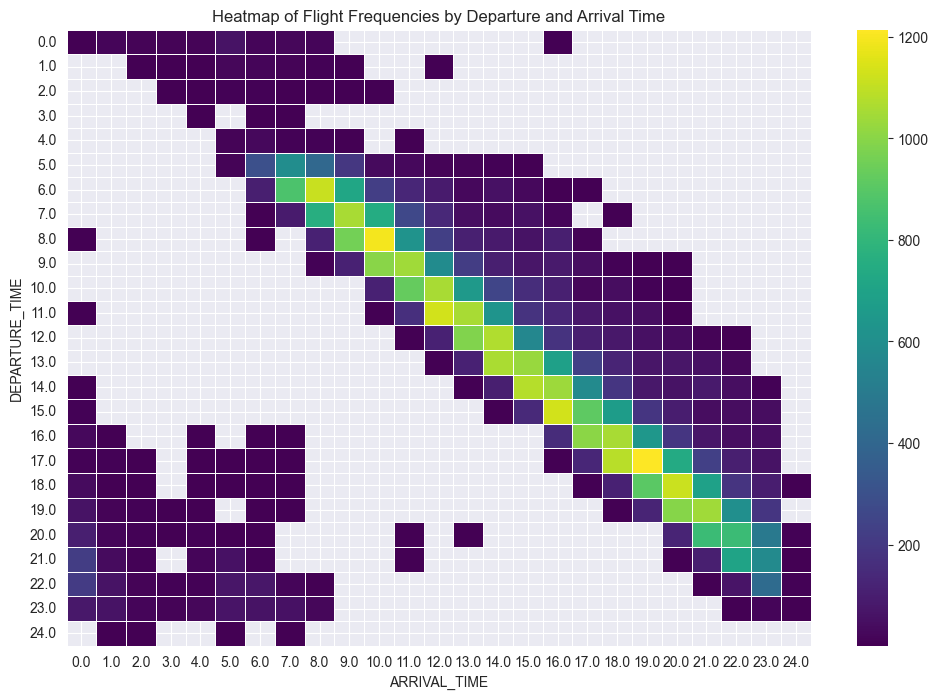

In [ ]:
flight_freq = flights.aggregate([
    {'$match': {'DEPARTURE_TIME': {'$gt': 0}, 'ARRIVAL_TIME': {'$gt': 0}}},
    {'$group': {'_id': {'DEPARTURE_TIME': {'$floor' : { '$divide': [ '$DEPARTURE_TIME', 100 ] }}, 
                        'ARRIVAL_TIME': {'$floor' : { '$divide': [ '$ARRIVAL_TIME', 100 ] }}},
                 'COUNT': {'$sum': 1}}},
    {'$project' : {'_id':0,'DEPARTURE_TIME':'$_id.DEPARTURE_TIME','ARRIVAL_TIME':'$_id.ARRIVAL_TIME','COUNT':1}}
])

flight_freq_df = pd.DataFrame(flight_freq)
# sns.scatterplot(flight_freq_df,x='DEPARTURE_TIME',y='ARRIVAL_TIME',hue='COUNT',palette='viridis')

plt.figure(figsize=(12, 8))
plt.title('Heatmap of Flight Frequencies by Departure and Arrival Time')
plt.xlabel('Arrival Time')
plt.ylabel('Departure Time')

heatmap_data = flight_freq_df.pivot(index='DEPARTURE_TIME', columns='ARRIVAL_TIME', values='COUNT')
sns.heatmap(heatmap_data, cmap='viridis', linewidths=0.5)

plt.show()


#### 23. Write a MongoDB query to calculate the frequency of flight takeoffs and landings within defined week of day. Generate a Suitable Plot.


In [ ]:
for i in flights.find_one():
    print(i)

_id
ID
YEAR
MONTH
DAY
DAY_OF_WEEK
AIRLINE
FLIGHT_NUMBER
TAIL_NUMBER
ORIGIN_AIRPORT
DESTINATION_AIRPORT
SCHEDULED_DEPARTURE
DEPARTURE_TIME
DEPARTURE_DELAY
TAXI_OUT
WHEELS_OFF
SCHEDULED_TIME
ELAPSED_TIME
AIR_TIME
DISTANCE
WHEELS_ON
TAXI_IN
SCHEDULED_ARRIVAL
ARRIVAL_TIME
ARRIVAL_DELAY
DIVERTED
CANCELLED
CANCELLATION_REASON
AIR_SYSTEM_DELAY
SECURITY_DELAY
AIRLINE_DELAY
LATE_AIRCRAFT_DELAY
WEATHER_DELAY


   total_takeoffs  total_landings  DAY_OF_WEEK
0            7412            7412            7
1            8744            8744            5
2            6692            6692            6
3            7442            7442            3
4            8084            8084            4
5            8024            8024            1
6            7414            7414            2


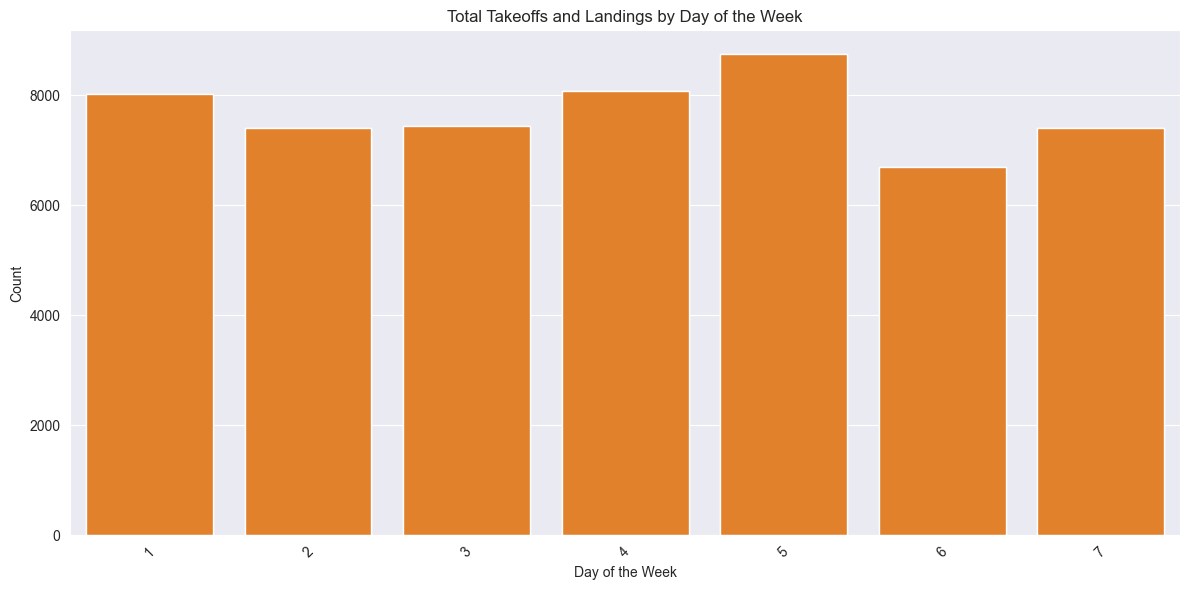

In [ ]:
week_day_freq = flights.aggregate([
{'$match': {'DEPARTURE_TIME': {'$gt': 0},'ARRIVAL_TIME': {'$gt': 0}}},
{'$group': {'_id': '$DAY_OF_WEEK','total_takeoffs': {'$sum': 1},'total_landings': {'$sum': 1}}},
{'$project': {'_id': 0,'DAY_OF_WEEK': '$_id','total_takeoffs': 1,'total_landings': 1}}
])

# for i in week_day_freq:
#     print(i)
week_day_df = pd.DataFrame(week_day_freq)
print(week_day_df)

plt.figure(figsize=(12, 6))
sns.barplot(data=week_day_df, x='DAY_OF_WEEK', y='total_takeoffs')
sns.barplot(data=week_day_df, x='DAY_OF_WEEK', y='total_landings')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Total Takeoffs and Landings by Day of the Week')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

#### 24. Write a MongoDB query to find all flights that departed between 6 AM and 12 PM (noon) local time, regardless of the date. Return the flightNumber, airline, and departureTime. Generate a Bar Plot using Time (x-axis) and Frequency (y-axis).

DEPARTURE_TIME
6.0     3362
7.0     3214
8.0     3484
9.0     3276
10.0    3337
11.0    3481
12.0      77
Name: count, dtype: int64


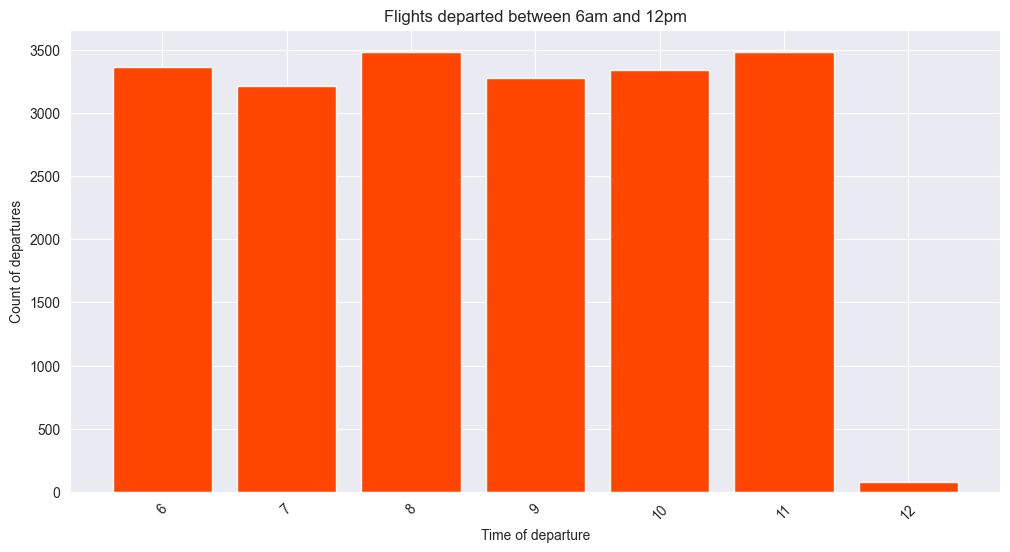

In [ ]:
flight_time = flights.aggregate([
    {'$match': {'DEPARTURE_TIME': {'$gte': 600, '$lte': 1200}}},
    {'$project' : {'_id':0,'FLIGHT_NUMBER':1,'AIRLINE':1,'DEPARTURE_TIME':{'$floor' : {'$divide': [ '$DEPARTURE_TIME', 100 ]}}}}
])
flight_time_df = pd.DataFrame(flight_time)
freq = flight_time_df.groupby('DEPARTURE_TIME')['DEPARTURE_TIME'].value_counts()
print(freq)

plt.figure(figsize=(12, 6))
plt.bar(height=freq.values, x=freq.index, color='orangered')
plt.xlabel('Time of departure')
plt.ylabel('Count of departures')
plt.title('Flights departed between 6am and 12pm')
plt.xticks(rotation=45)

plt.show()

#### 25. When is the best time of day/day of week/time of a year to fly with minimum delays?

In [ ]:
delay_day = flights.aggregate([
    {'$match': {'DEPARTURE_DELAY': {'$gt': 0},'ARRIVAL_DELAY': {'$gt': 0}}},
    {'$group': {'_id':'$DAY', 'avgDelay': {'$avg':{'$add': ['$ARRIVAL_DELAY','$DEPARTURE_DELAY']}}}},
    {'$project': {'_id':0,'DAY':'$_id','avgDelay' :{'$round': ['$avgDelay',2]}}},
    {'$sort':{'avgDelay':1}}
])

delay_day_df = pd.DataFrame(delay_day)
delay_day_df

,DAY,avgDelay
0,31,4.39
1,29,5.04
2,10,5.21
3,14,7.38
4,19,8.34
5,15,10.84
6,18,11.25
7,7,11.29
8,13,11.30
9,23,12.18


In [ ]:
delay_week = flights.aggregate([
    {'$match': {'DEPARTURE_DELAY': {'$gt': 0},'ARRIVAL_DELAY': {'$gt': 0}}},
    {'$group': {'_id':'$DAY_OF_WEEK', 'avgDelay': {'$avg':{'$add': ['$ARRIVAL_DELAY','$DEPARTURE_DELAY']}}}},
    {'$project': {'_id':0,'DAY_OF_WEEK':'$_id','avgDelay' :{'$round': ['$avgDelay',2]}}},
    {'$sort':{'avgDelay':1}}
])

delay_week_df = pd.DataFrame(delay_week)
delay_week_df

,DAY_OF_WEEK,avgDelay
0,4,75.07
1,5,75.93
2,3,77.53
3,1,78.61
4,6,79.73
5,2,82.00
6,7,83.37


In [ ]:
delay_month = flights.aggregate([
    {'$match': {'DEPARTURE_DELAY': {'$gt': 0},'ARRIVAL_DELAY': {'$gt': 0}}},
    {'$group': {'_id':'$MONTH', 'avgDelay': {'$avg':{'$add': ['$ARRIVAL_DELAY','$DEPARTURE_DELAY']}}}},
    {'$project': {'_id':0,'MONTH':'$_id','avgDelay' :{'$round': ['$avgDelay',2]}}},
    {'$sort':{'avgDelay':1}}
])

delay_month_df = pd.DataFrame(delay_month)
delay_month_df

,MONTH,avgDelay
0,2,78.08
1,1,78.77
2,3,81.10


C:\Users\Administrator\AppData\Local\Temp\ipykernel_12044\2126421450.py:13: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:b'` for the same effect.

  sns.barplot(data=delay_month_df, x='MONTH', y='avgDelay', ax=plt3,color='b',hue='MONTH')


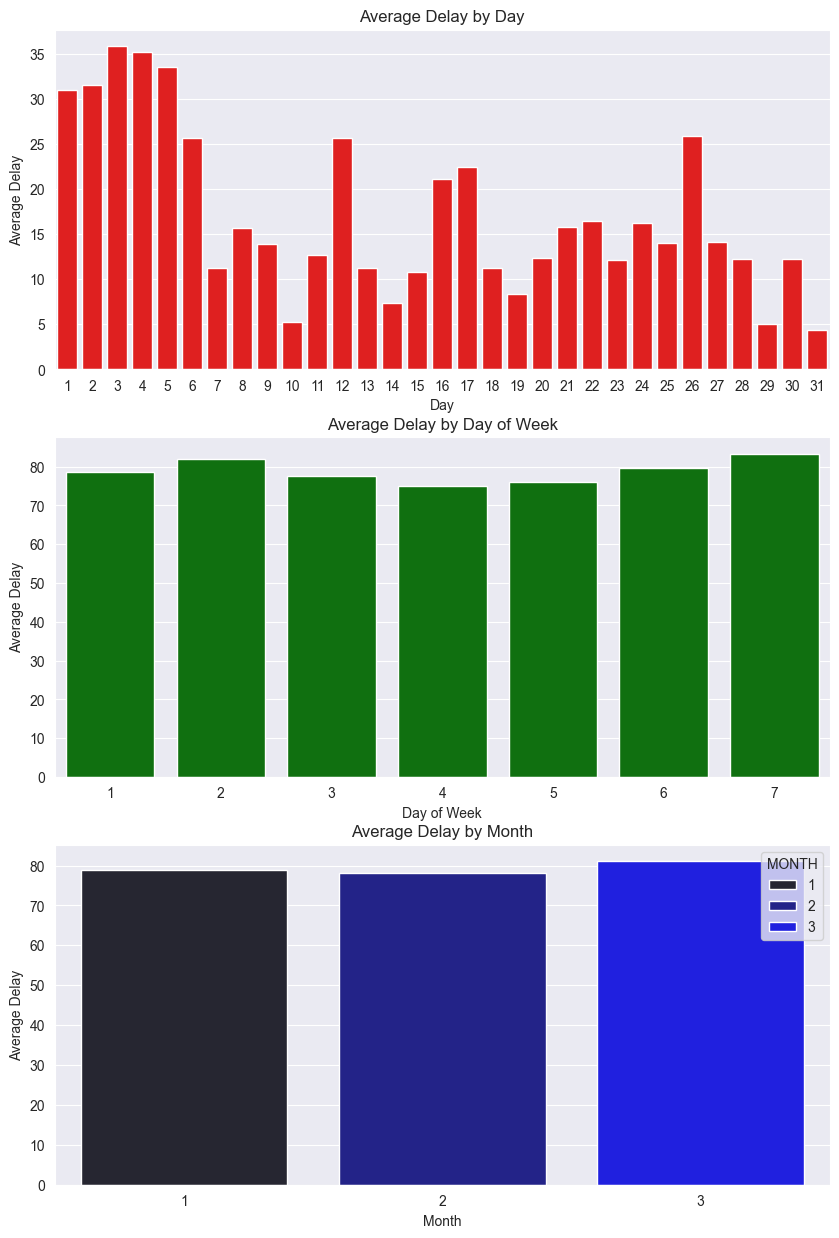

In [ ]:
fig, (plt1, plt2, plt3) = plt.subplots(3, 1, figsize=(10, 15))

sns.barplot(data=delay_day_df, x='DAY', y='avgDelay', ax=plt1,color='r')
plt1.set_title('Average Delay by Day')
plt1.set_xlabel('Day')
plt1.set_ylabel('Average Delay')

sns.barplot(data=delay_week_df, x='DAY_OF_WEEK', y='avgDelay', ax=plt2,color='g')
plt2.set_title('Average Delay by Day of Week')
plt2.set_xlabel('Day of Week')
plt2.set_ylabel('Average Delay')

sns.barplot(data=delay_month_df, x='MONTH', y='avgDelay', ax=plt3,color='b',hue='MONTH')
plt3.set_title('Average Delay by Month')
plt3.set_xlabel('Month')
plt3.set_ylabel('Average Delay')

plt.show()


#### Insight : The best day to travel is 1st Month of the year , especially saturday when considering the week and 31st day of every month with lease average total delay caused by the flights.